In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading the data
file = r'D:\Learning\Codes\AQI\Data\Real-Data\Real_Combine.csv'
data = pd.read_csv(file)
data.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4   40.333333
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1   17.708333
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

In [5]:
# Checking for NULL values 
data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    2
dtype: int64

<AxesSubplot:>

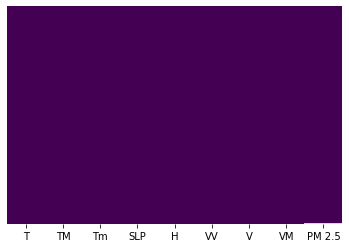

In [6]:
# Plot to check NULL values using Heatmap
sns.heatmap(data.isnull(), yticklabels=False, cbar=False,cmap='viridis' )

In [7]:
df = data.dropna()

In [8]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1088 non-null   float64
 1   TM      1088 non-null   float64
 2   Tm      1088 non-null   float64
 3   SLP     1088 non-null   float64
 4   H       1088 non-null   float64
 5   VV      1088 non-null   float64
 6   V       1088 non-null   float64
 7   VM      1088 non-null   float64
 8   PM 2.5  1088 non-null   float64
dtypes: float64(9)
memory usage: 85.0 KB


In [10]:
X = df.iloc[:,:-1] ## Independent feature
y = df.iloc[:,-1] ## Depedent features

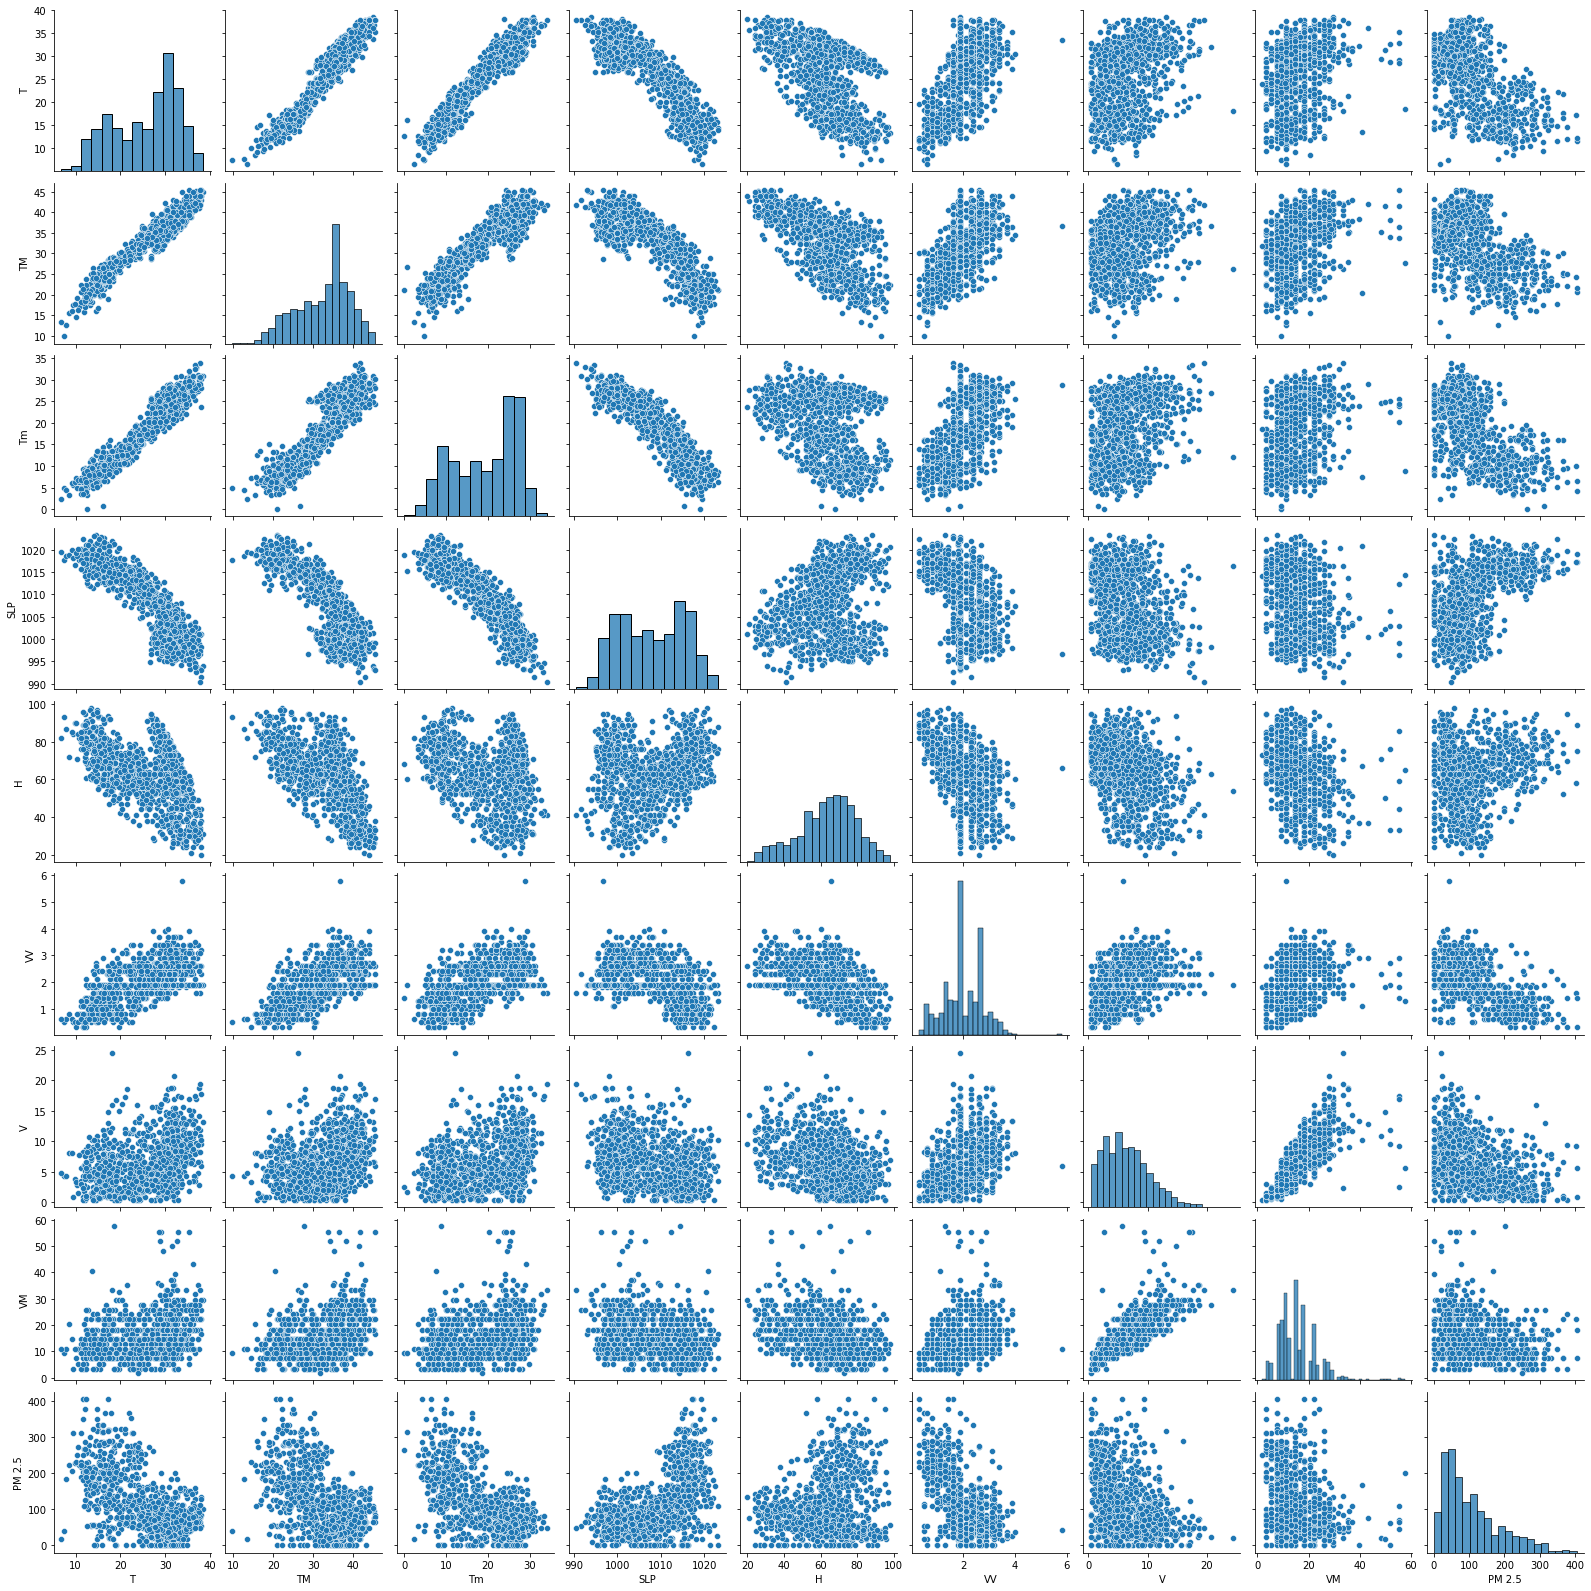

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.963416  0.957227 -0.883207 -0.488919  0.625547  0.320218   
TM      0.963416  1.000000  0.889979 -0.826008 -0.576799  0.598727  0.303218   
Tm      0.957227  0.889979  1.000000 -0.912333 -0.275047  0.547490  0.312165   
SLP    -0.883207 -0.826008 -0.912333  1.000000  0.231971 -0.483494 -0.325862   
H      -0.488919 -0.576799 -0.275047  0.231971  1.000000 -0.489597 -0.356241   
VV      0.625547  0.598727  0.547490 -0.483494 -0.489597  1.000000  0.369851   
V       0.320218  0.303218  0.312165 -0.325862 -0.356241  0.369851  1.000000   
VM      0.276548  0.285671  0.244408 -0.269129 -0.368694  0.325963  0.780952   
PM 2.5 -0.603371 -0.536969 -0.638572  0.586205  0.145657 -0.568058 -0.318189   

              VM    PM 2.5  
T       0.276548 -0.603371  
TM      0.285671 -0.536969  
Tm      0.244408 -0.638572  
SLP    -0.269129  0.586205  
H      -0.368694  0.145657  
VV      0.325963 -0.568058  
V       0.780952 -0.318189  
VM      1.000000 -0.252764  
PM 2.5 -0.252764  1.000000

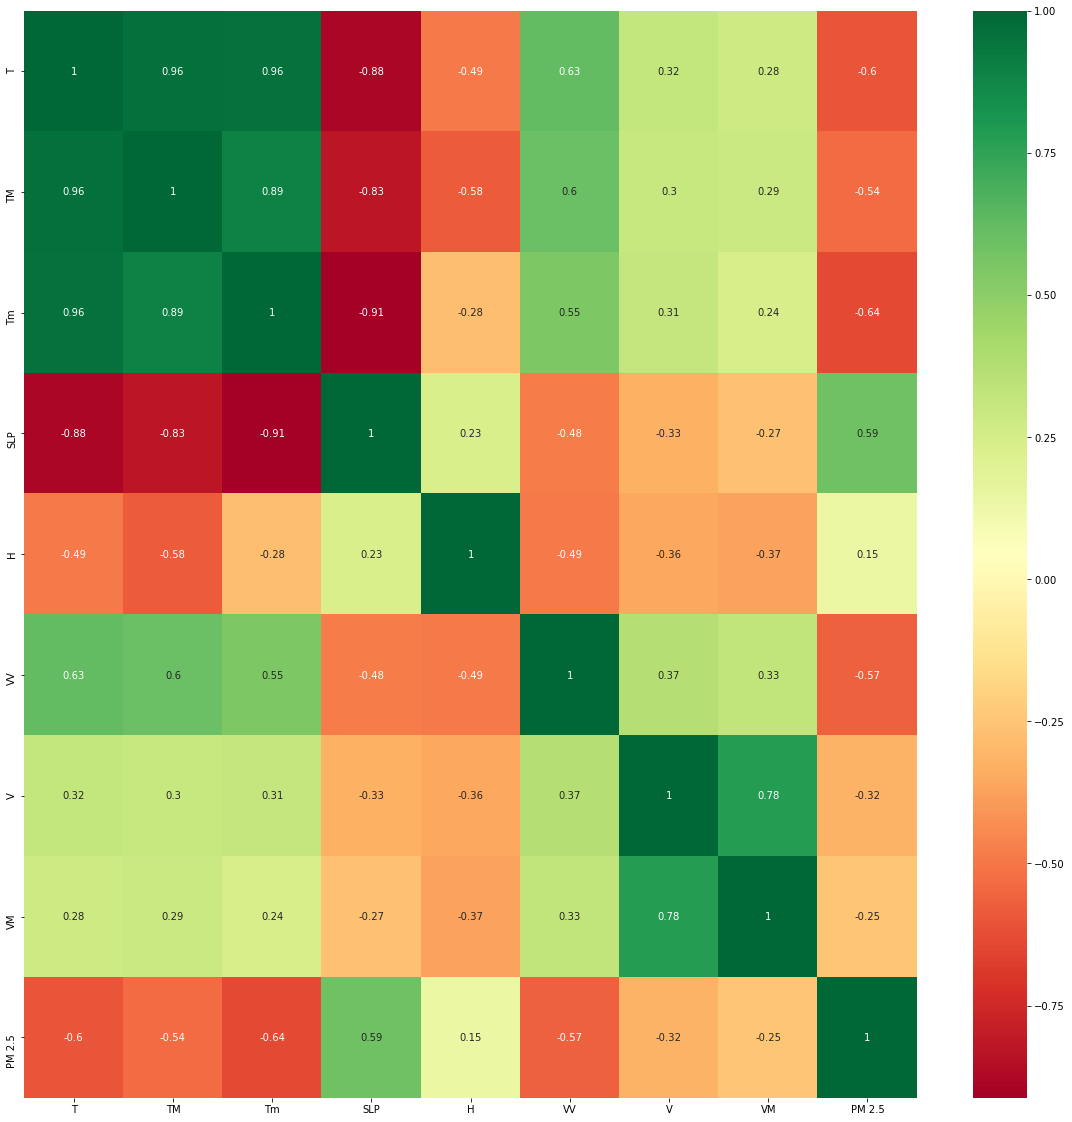

In [13]:
#Correlation using Heatmap
plt.figure(figsize=(20,20))
g = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [14]:
# Feature Importance 
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [15]:
print(model.feature_importances_)

[0.15658884 0.10448812 0.18657606 0.15562459 0.08531916 0.19840419
 0.06358649 0.04941257]


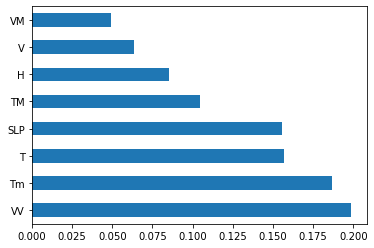

In [16]:
#Plot graph for the feature importance for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

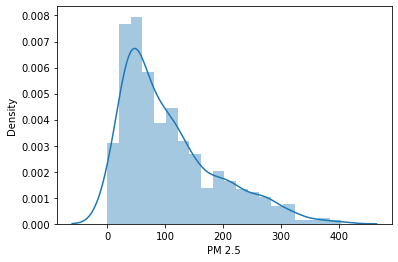

In [17]:
sns.distplot(y)

In [19]:
# Test Train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Comparison Linear, Ridge and Lasso Regression

### Linear Regression

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [36]:
lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor,X_train,y_train, scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-3390.120289925931


### Ridge Regression

In [37]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [40]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 10}
-3388.968352988886


### Lasso Regression

In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [38]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 979249.1102680432, tolerance: 394.5982218575361
  model = cd_fast.enet_coordinate_descent(
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 985625.9387089482, tolerance: 401.1695496620542
  model = cd_fast.enet_coordinate_descent(
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 983047.3313822212, tolerance: 420.51086820709037
  model = cd_fast.enet_coordinate_descent(
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [39]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-3373.4979743633985


## Since Lasso value to nearer to the zero, it will be selected 

### Model Evaluation

In [41]:
prediction = lasso_regressor.predict(X_test)

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

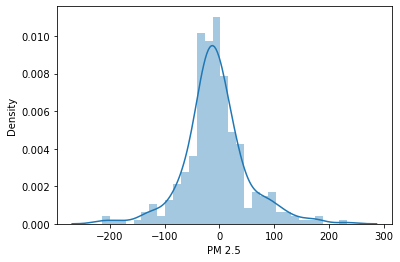

In [43]:
sns.distplot(y_test-prediction)

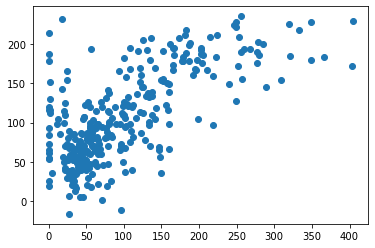

In [44]:
plt.scatter(y_test,prediction)

In [45]:
from sklearn import metrics

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 40.986940652192715
MSE: 3374.7446506839424
RMSE: 58.09255245454397


In [47]:
import pickle

In [48]:
# open a file, where you want to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)